# Ejercicio de regresión logística

In [ ]:

# Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Cargamos los datos
data = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/ex2data1.txt', header=None, names=['exam_1', 'exam_2','Admitted'])
data.head()

,exam_1,exam_2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
# Responder a las siguientes preguntas
# ¿Cuál es mi variable objetivo? ¿Y mis variables predictoras?
# ¿Cuántas observaciones tenemos? ¿Es poco o mucho volumen?
# ¿Qué tipo de aprendizaje es?
# ¿Estamos ante un problema de regresión o de clasificación?
# ¿Qué finalidad pretendemos alcanzar?

## EDA (Ánalisis exploratorio de datos)

In [ ]:
# Análisis estadístico de las variables
...

<Axes: xlabel='exam_1', ylabel='exam_2'>

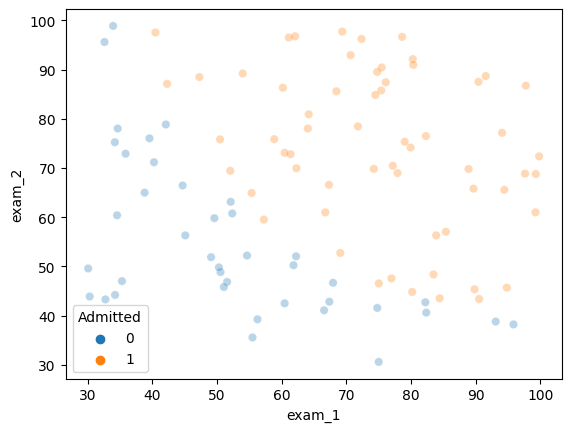

In [ ]:
sns.scatterplot(x='exam_1', y='exam_2', hue='Admitted', alpha =0.3, data=data)

In [ ]:
# Distribución del output ¿Están los datos balanceados o desbalanceados?
data['Admitted'].value_counts()

1    60
0    40
Name: Admitted, dtype: int64

In [ ]:
# Definimos la función sigmoidal (convierte el output entre 0 y 1)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

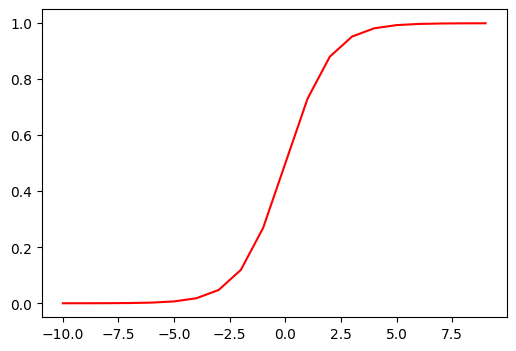

In [ ]:
# Representación de la función sigmoidal
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nums, sigmoid(nums), 'r')

In [ ]:
# Regresión Logística
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
X = data[['exam_1', 'exam_2']]
y = data[['Admitted']]
logmodel.fit(X,y)

LogisticRegression()

In [ ]:
# Persona con buenas notas
X_new = pd.DataFrame({'exam_1': [80],
                      'exam_2': [80]})
preds = logmodel.predict_proba(X_new)
preds[:,1]

array([0.99940295])

In [ ]:
print(preds)

[[5.97054964e-04 9.99402945e-01]]


In [ ]:
print(logmodel.intercept_)
print(logmodel.coef_)

[-25.05219314]
[[0.20535491 0.2005838 ]]


In [ ]:
# Probabilidad de admisión de un alumno que ha sacado 60 en el primer examen y 60 en el segundo
# Persona con buenas notas
X_new = pd.DataFrame({'exam_1': [60],
                      'exam_2': [60]})
preds_2 = logmodel.predict_proba(X_new)
print(preds_2[:,1])


[0.3327285]


In [ ]:
# Nueva columna (train / test)
data['type'] = 'train'

#
obs_1 = pd.DataFrame({'exam_1': [80], 'exam_2': [80], 'Admitted': preds[:,1], 'type': "test"})
obs_2 = pd.DataFrame({'exam_1': [60], 'exam_2': [60], 'Admitted': preds_2[:,1], 'type': "test"})

#
print(obs_1)
print(obs_2)

   exam_1  exam_2  Admitted  type
0      80      80  0.999403  test
   exam_1  exam_2  Admitted  type
0      60      60  0.332728  test


In [ ]:
data_total = pd.concat([data,obs_1, obs_2])

In [ ]:
data_total

,exam_1,exam_2,Admitted,type
0,34.623660,78.024693,0.000000,train
1,30.286711,43.894998,0.000000,train
2,35.847409,72.902198,0.000000,train
3,60.182599,86.308552,1.000000,train
4,79.032736,75.344376,1.000000,train
...,...,...,...,...
97,99.315009,68.775409,1.000000,train
98,55.340018,64.931938,1.000000,train
99,74.775893,89.529813,1.000000,train
0,80.000000,80.000000,0.999403,test


<Axes: xlabel='exam_1', ylabel='exam_2'>

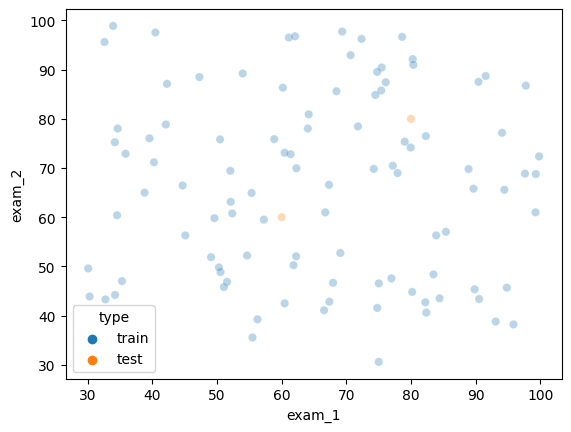

In [ ]:
# first, plot the observed data
sns.scatterplot(x='exam_1', y='exam_2', hue='type', alpha =0.3, data=data_total)

In [ ]:
print(logmodel.intercept_)
print(logmodel.coef_)

[-25.05219314]
[[0.20535491 0.2005838 ]]


In [ ]:
b_0 = logmodel.intercept_
b_1 = logmodel.coef_[0][0]
b_2 = logmodel.coef_[0][1]
print(b_0, b_1, b_2)

[-25.05219314] 0.20535491218577978 0.2005838039553014


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Estudiante 1
print(1/(1+np.exp(-(b_0 + b_1 *80 + b_2*80))))
# Estudiante 2
print(1/(1+np.exp(-(b_0 + b_1 *60 + b_2*60))))

[0.99940295]
[0.3327285]


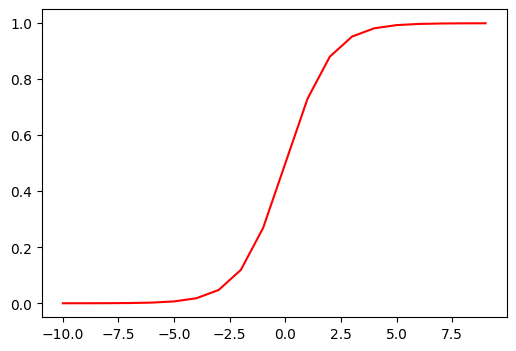

In [ ]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nums, sigmoid(nums), 'r')

# Churn & Telco
[Dataset](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383)

## Carga de datos

Importaremos el dataset de sobre el que trabajaremos

In [ ]:
# Cargamos
df = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/telecom_churn.csv')
df.head() # Cogemos las primeras 5 filas

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Hemos creado el primer objeto **df**, que es una matriz con datos. Esta matriz contiene los datos y contiene:

1. **Clase**: plantilla genérica (molde o reglas) de cómo es ese objeto.
2. **Atributos**: son los diferentes características que puede tener un objeto. Para nuestro caso será, el **tamaño**, el nombre de las columnas. *Van sin paréntesis*
3. **Métodos**: Son las acciones que podremos utilizar sobre nuestros objetos. Calcular medias, sumas, conteos, etc. *Van con paréntesis*





In [ ]:
# Ejemplo dinámico de Google Colab
df.shape

(3333, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

## Manipulación del dataset
Tenemos creado el objeto df en memoria y podemos crear diferentes

In [ ]:
df.describe() # Descriptivo de todas las variables numéricas

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# Devuelve 1 columna
df["State"].head()

0    KS
1    OH
2    NJ
3    OH
4    OK
Name: State, dtype: object

In [ ]:
# Devuelve las primeras dos observaciones
df[0:2]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [ ]:
print(df.shape)
print(df.columns)

(3333, 20)
Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')



**Creación de columnas**, para empezar a modelar

In [ ]:
df['Churn_num'] = df['Churn'].astype('int64')

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Churn_num
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0


**Eliminar** una variable

In [ ]:
df = df.drop(columns="Churn")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn_num
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Cambiar nombre** a una variable

In [ ]:
df.rename(columns={"Churn_num": "Churn"}, inplace=True)
df.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


**Cálculo** sobre una columna

In [ ]:
print(df['Churn'].value_counts())

0    2850
1     483
Name: Churn, dtype: int64


In [ ]:
print(df['Churn'].value_counts())
df['Churn'].value_counts(normalize=True)

0    2850
1     483
Name: Churn, dtype: int64


0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [ ]:
df['Churn'].mean()

0.14491449144914492

**Filtar** por condición

In [ ]:
df[df['State'] == 'CO']

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
56,CO,141,415,No,No,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1,0
57,CO,121,408,No,Yes,30,198.4,129,33.73,75.3,77,6.40,181.2,77,8.15,5.8,3,1.57,3,1
82,CO,55,408,No,Yes,25,165.6,123,28.15,136.1,95,11.57,175.7,90,7.91,11.0,2,2.97,3,0
108,CO,141,415,No,Yes,32,148.6,91,25.26,131.1,97,11.14,219.4,142,9.87,10.1,1,2.73,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011,CO,103,415,No,Yes,37,153.5,78,26.10,241.9,108,20.56,244.7,110,11.01,10.6,3,2.86,1,0
3021,CO,57,415,No,No,0,85.9,92,14.60,193.9,127,16.48,231.5,93,10.42,10.1,2,2.73,0,0
3064,CO,130,408,No,No,0,271.8,129,46.21,237.2,128,20.16,210.1,91,9.45,8.7,2,2.35,4,1
3075,CO,181,510,No,Yes,40,105.2,61,17.88,341.3,79,29.01,165.7,97,7.46,6.3,3,1.70,2,0


In [ ]:
(df[df['Churn'] == 1]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,1
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,1


In [ ]:
len(df[df['Churn'] == 1])

483

**Filtro más operación**

In [ ]:
df[df['Churn'] == 1].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

In [ ]:
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494823

**Agrupación**: agrupar por diferentes condiciones.

In [ ]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [ ]:
df.groupby(['Churn'])['Total day charge','Total eve charge', 'Total night charge'].mean()

,Total day charge,Total eve charge,Total night charge
Churn,,,
0,29.780421,16.918909,9.006074
1,35.175921,18.054969,9.235528


In [ ]:
df.groupby(['Churn'])['Total day charge','Total eve charge', 'Total night charge'].mean()

,Total day charge,Total eve charge,Total night charge
Churn,,,
0,29.780421,16.918909,9.006074
1,35.175921,18.054969,9.235528


**Visualización**

Aquí utilizaremos diferentes plots de la libreria `seaborn` que está importada como `sns`.
Como siempre hay un [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf), principales gráficos:


* Scatterplot
* Bar Chart
* Count Plot
* Point Plot
* Boxplot
* Violinplot



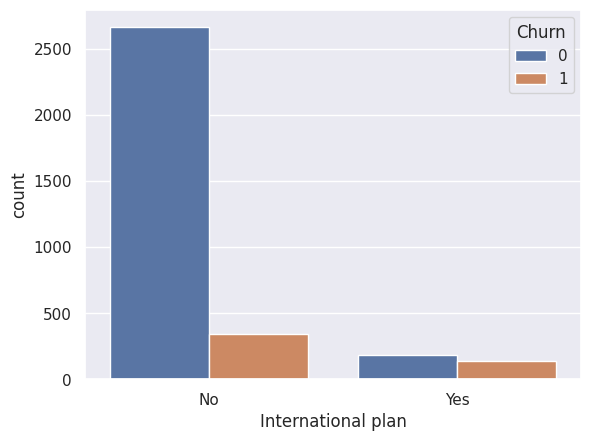

In [ ]:
sns.set()
sns.countplot(x='International plan', hue='Churn', data=df);

<Axes: xlabel='Total day charge', ylabel='Total eve charge'>

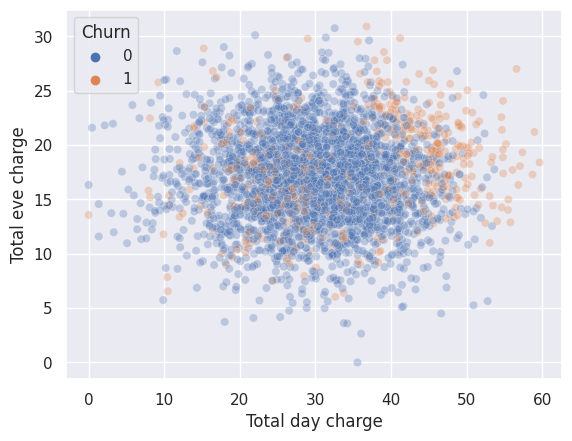

In [ ]:
sns.scatterplot(x='Total day charge', y='Total eve charge', hue='Churn', alpha =0.3, data=df)

## Ejercicio: Manipulación / Visualización

[Pandas CheatSheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

[Seaborn CheatSheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

**Manipulación de datos**

0. Utiliza el atributo `columns`
1.   Utiliza la función `isnull()` a la columna `State`. Aplica la función `sum()` a posteriori
2.   **Crea una columna** que sea la multiplicación de `Total day charge` y `Total eve charge`, llámala `prod_day_eve`
3. De la columna **State**, utiliza la función `value_counts` para ver los atributos con su número con opción `normalize=True` y sin
4. Calcula la media de todas las variables por aquellos usuarios que `Churn=0` (filtro + operación)

**Visualización**

1.   Utiliza un `countplot` para ver si hay diferencias en el churn de los que tienen `Voice Plan`
2.   Utiliza un `barplot` donde x es el estado, y es `total day charge`, filtra en df por el estado `KS`

**Avanzados**

1. Utiliza un `apply` en el dataframe con la función `max` de la libreria numpy
2. Utiliza el método `corr()` para crear una matriz de correlaciones llamada `df_corr`. Utiliza la libreria seaborn para poder graficarla `heatmap`. Si te sobre tiempo piensa en cómo hacer visualmente atractiva



In [ ]:
# Manipulación de datos
## Utiliza el atributo columns

## Utiliza la función isnull() a la columna State. Aplica la función sum() a posteriori

## Crea una columna que sea la multiplicación de Total day charge y Total eve charge, llámala prod_day_eve

## De la columna State, utiliza la función value_counts para ver los atributos con su número con opción normalize=True y sin

## Calcula la media de todas las variables por aquellos usuarios que Churn=0 (filtro + operación)


In [ ]:
# Visualización
## Utiliza un countplot para ver si hay diferencias en el churn de los que tienen Voice Plan

## Utiliza un barplot donde x es el estado, y es total day charge, filtra en df por el estado KS


In [ ]:
# Avanzados
## Utiliza un apply en el dataframe con la función max de la libreria numpy

## Utiliza el método corr() para crear una matriz de correlaciones llamada df_corr. Utiliza la libreria seaborn para poder graficarla heatmap. Si te sobre tiempo piensa en cómo hacer visualmente atractiva


## First ML Model: Logistic Regression

In [ ]:
# Cargamos
df = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/telecom_churn.csv')
df.head() # Cogemos las primeras 5 filas

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Pasamos Churn a numerica
df['Churn'] = df['Churn'].astype('int64')

¿Que pasa con las Variables categóricas? [Get dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [ ]:
vmp = pd.get_dummies(df['Voice mail plan'],prefix="voice")   #
ip = pd.get_dummies(df['International plan'],prefix="ip")

In [ ]:
vmp

,voice_No,voice_Yes
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
3328,0,1
3329,1,0
3330,1,0
3331,1,0


In [ ]:
pd.get_dummies(df['State'],drop_first=False).head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Quitamos columna State
df.drop('State',axis=1,inplace=True)

In [ ]:
df.drop(['Voice mail plan','International plan'],axis=1,inplace=True)
df = pd.concat([df,vmp,ip],axis=1)
df.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,voice_No,voice_Yes,ip_No,ip_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,11.01,10.0,3,2.70,1,0,0,1,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,11.45,13.7,3,3.70,1,0,0,1,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,7.32,12.2,5,3.29,0,0,1,0,1,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,8.86,6.6,7,1.78,2,0,1,0,0,1
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,8.41,10.1,3,2.73,3,0,1,0,0,1


### Matriz de entrenamiento
Aquí ya tendríamos lista nuestra matriz de entrenamiento, para ello cargaremos las diferentes librerías necesarias para entrenar un primer algoritmo.

### Separamos train y test

In [ ]:
import random
random.seed(113)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1),
                                                    df['Churn'], test_size=0.25,
                                                    random_state=101)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2499, 20)
(2499,)
(834, 20)
(834,)


In [ ]:
y_test

3047    0
3021    0
1671    0
1612    0
1428    0
       ..
1098    0
2609    0
3274    0
887     0
175     0
Name: Churn, Length: 834, dtype: int64

### Entrenamos y predecimos

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

Predecimos en test

Evaluamos las predicciones

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
dif = abs(predictions - y_test)
sum_dif = sum(dif)
error_rate = sum_dif / len(dif)
accuracy = 1 - error_rate
accuracy

0.8752997601918465

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       729
           1       0.55      0.06      0.10       105

    accuracy                           0.88       834
   macro avg       0.71      0.53      0.52       834
weighted avg       0.84      0.88      0.83       834



Utilizaremos `predict_proba`:

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
roc_auc

0.756352472401855

In [ ]:
logmodel.predict_proba(X_test)[:,1][1:20]

array([0.0459292 , 0.19169402, 0.22350627, 0.32423383, 0.03124161,
       0.23776031, 0.0924595 , 0.03132794, 0.07637623, 0.12749603,
       0.07628324, 0.28817085, 0.41046951, 0.13230596, 0.09649726,
       0.40198831, 0.09206406, 0.02157575, 0.22076391])

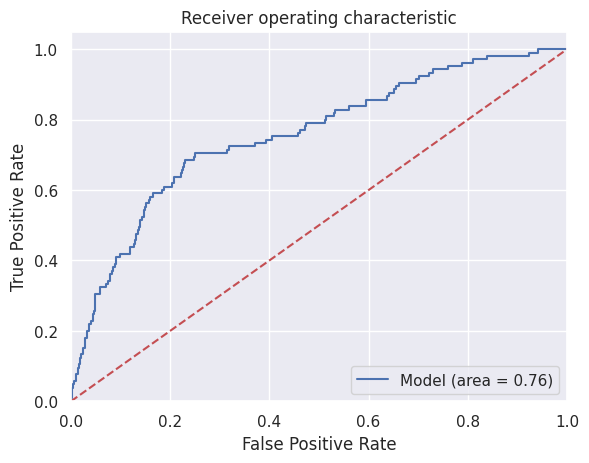

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
prob_pred = pd.DataFrame({'probs':logmodel.predict_proba(X_test)[:,1]})
df_ytest = pd.DataFrame(y_test)

In [ ]:
prob_pred.reset_index(drop=True, inplace=True)
df_ytest.reset_index(drop=True, inplace=True)
test_probs = pd.concat([prob_pred,df_ytest],axis=1)
test_probs.head()

,probs,Churn
0,0.163653,0
1,0.045929,0
2,0.191694,0
3,0.223506,0
4,0.324234,0


### Ejercicio Modelo

**Visualización**
- Seguido del distribution plot, ¿podrías hacer un `sns`boxplot donde x sea el churn y y la probabilidad?


**Modelado**
¿Podrías intentar mejorar el modelo actual creando nuevas variables?
- ¿Que equipo tendrá mejor AUC?


<Axes: xlabel='Churn', ylabel='probs'>

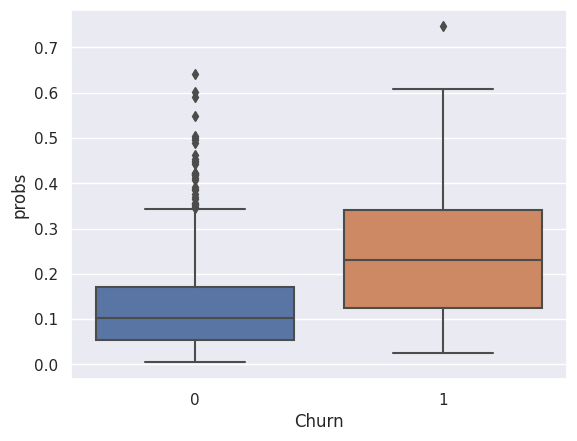

In [ ]:
# Visualización
## Seguido del distribution plot, ¿podrías hacer un `sns`boxplot donde x sea el churn y y la probabilidad?
sns.boxplot(data=test_probs, x = "Churn", y = "probs")



In [ ]:
df.columns

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Churn', 'voice_No', 'voice_Yes', 'ip_No',
       'ip_Yes'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.replace(' ','_')

In [ ]:
df

,Account_length,Area_code,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,...,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,voice_No,voice_Yes,ip_No,ip_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,11.01,10.0,3,2.70,1,0,0,1,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,11.45,13.7,3,3.70,1,0,0,1,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,7.32,12.2,5,3.29,0,0,1,0,1,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,8.86,6.6,7,1.78,2,0,1,0,0,1
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,8.41,10.1,3,2.73,3,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,12.56,9.9,6,2.67,2,0,0,1,1,0
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,8.61,9.6,4,2.59,3,0,1,0,1,0
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,8.64,14.1,6,3.81,2,0,1,0,1,0
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,...,6.26,5.0,10,1.35,2,0,1,0,0,1


Para el siguiente apartado podemos realizar nuevas visualizaciones

In [ ]:
#Modelado
## ¿Podrías intentar mejorar el modelo actual creando nuevas variables?
## ¿Que equipo tendrá mejor AUC?

# Cargamos
df = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/telecom_churn.csv')

# Pasamos Churn a numerica
df['Churn'] = df['Churn'].astype('int64')

# Creamos variables dummies
vmp = pd.get_dummies(df['Voice mail plan'],drop_first=True,prefix="voice")   #
ip = pd.get_dummies(df['International plan'],drop_first=True,prefix="ip")

# Quitamos columna State.
# TO DO: ¿Alguna idea para ahora?
state_dum = pd.get_dummies(df['State'],drop_first=True,prefix="s_")
df.drop('State',axis=1,inplace=True)

# Quitamos columnas voice mail e International plan
df.drop(['Voice mail plan','International plan'],axis=1,inplace=True)
df = pd.concat([df,vmp,ip,state_dum],axis=1)

# TO DO: ¿Podemos crear más variables?


# Separamos train y test
import random
random.seed(113)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1),
                                                    df['Churn'], test_size=0.25,
                                                    random_state=101)

# Importamos el modelo y entrenamos
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

# Predecimos
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
print('Team AUC:', roc_auc)


Team AUC: 0.7417858775883467
